In [ ]:
!wget https://www.dropbox.com/s/4b9w456kxeg6yhh/dataset.zip?dl=0
!unzip /content/dataset.zip?dl=0

--2023-03-20 15:06:22--  https://www.dropbox.com/s/4b9w456kxeg6yhh/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4b9w456kxeg6yhh/dataset.zip [following]
--2023-03-20 15:06:22--  https://www.dropbox.com/s/raw/4b9w456kxeg6yhh/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucead5ba56cca726e8ea9d85b735.dl.dropboxusercontent.com/cd/0/inline/B4lbprGxaMMoEuGYTzbZ-hc-NQO0oZz4ZJhHIhRb5u_cFl-JTA1Oy7Mg0t8SqhYrgqumZHJWaVYe-YT2Zjtr1jD6DxFCMI3HrkuxqRuAX9JPSMoDBGRpwB8nS83bbErpBNTtbXa7a6Ij6P0T-Md7tmCHp8gkVZQa2cyddT2Aperg-w/file# [following]
--2023-03-20 15:06:23--  https://ucead5ba56cca726e8ea9d85b735.dl.dropboxusercontent.com/cd/0/inline/B4lbprGxaMMoEuGYTzbZ-hc-NQO0oZz4ZJhHIhRb5u_cFl-JTA1Oy7Mg0t8SqhYrgqumZHJWaVY

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('dataset', output="training_dataset", seed=1337, ratio=(0.5, 0.3, 0.2)) 

Copying files: 1386 files [00:00, 2913.12 files/s]


In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras

from keras.preprocessing.image import  ImageDataGenerator
from keras_preprocessing.image import img_to_array , load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
len(os.listdir("/content/training_dataset/train"))

7

In [ ]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function= preprocess_input )

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input )

test_datagen = ImageDataGenerator(preprocessing_function= preprocess_input )

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/training_dataset/train",
                                          target_size= (256,256), batch_size=32)

val = val_datagen.flow_from_directory(directory= "/content/training_dataset/val",
                                        target_size= (256,256), batch_size=32)


test = test_datagen.flow_from_directory(directory= "/content/training_dataset/test",
                                        target_size= (256,256), batch_size=32)

Found 692 images belonging to 7 classes.
Found 412 images belonging to 7 classes.
Found 280 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
t_img , label = train.next()

In [ ]:
def plotImage(img_arr, label):
    
    for im , l in zip(img_arr , label):
        plt.figure(figsize=(5,5))
        plt.show()
        

In [ ]:
plotImage(t_img[:3], label[:3])

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
pip install keras-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
import keras
import keras_metrics

In [ ]:
base_model = ResNet50(input_shape=(256,256,3), include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units= 7, activation='softmax')(X)


#Creating our model
model = Model(base_model.input, X)

In [ ]:
model.summary()
Model: "model"

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
his = model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy , metrics= ['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


# model check point
mc = ModelCheckpoint(filepath="best_accuracy_model.h5",
                     monitor= 'accuracy',
                     verbose=1 ,
                     save_best_only= True)

# early stopping
es = EarlyStopping(monitor= 'accuracy', min_delta= 0.001, patience= 3,verbose=1)



cb = [mc,es]

In [ ]:
his = model.fit_generator(train , 
                          steps_per_epoch= 16,
                          epochs= 50,
                          verbose= 1,
                          callbacks= cb )

<ipython-input-26-cab03b4fd68e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train ,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 11.7921 - accuracy: 0.6320 - precision_1: 0.6454 - recall_1: 0.6260
Epoch 1: accuracy improved from -inf to 0.63200, saving model to best_accuracy_model.h5
16/16 [==============================] - 26s 842ms/step - loss: 11.7921 - accuracy: 0.6320 - precision_1: 0.6454 - recall_1: 0.6260
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 2.2596 - accuracy: 0.9238 - precision_1: 0.9238 - recall_1: 0.9238
Epoch 2: accuracy improved from 0.63200 to 0.92383, saving model to best_accuracy_model.h5
16/16 [==============================] - 14s 845ms/step - loss: 2.2596 - accuracy: 0.9238 - precision_1: 0.9238 - recall_1: 0.9238
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.2034 - accuracy: 0.9414 - precision_1: 0.9414 - recall_1: 0.9414
Epoch 3: accuracy improved from 0.92383 to 0.94141, saving model to best_accuracy_model.h5
16/16 [==============================] - 14s 891ms/step - los

In [ ]:
# load best model

from keras.models import load_model

model = load_model("/content/best_accuracy_model.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1'])

In [ ]:
Accuracy = h['accuracy']

<ipython-input-31-d7e7fb557314>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['loss'], 'go--' , c= "blue")
<ipython-input-31-d7e7fb557314>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'] , 'go--' ,  c = "red")


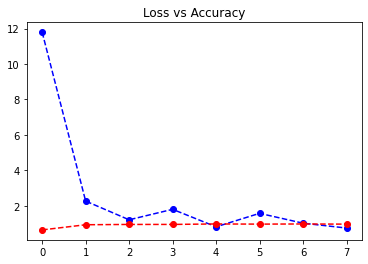

In [ ]:
plt.plot(h['loss'], 'go--' , c= "blue")
plt.plot(h['accuracy'] , 'go--' ,  c = "red")
plt.title("Loss vs Accuracy")
plt.show()

In [ ]:
T_his = model.evaluate(test)
print("Loss: {} Accuracy: {}".format(T_his[0], T_his[1]*100))

9/9 [==============================] - 7s 527ms/step - loss: 1.7004 - accuracy: 0.9464 - precision_1: 0.9464 - recall_1: 0.9464
Loss: 1.7003930807113647 Accuracy: 94.64285969734192
